# The Spark Foundation :  GRIP  Jan-2021

# Task-4 : Exploratory Data Analysis - Terrorism

### Description : As a security/defense analyst, try to find out the hot zone of terrorism and What all security issues and insights you can derive by EDA?

# Importing libraries

In [1]:
#Importing all Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
terror_data = pd.read_csv('C:/Users/srinivas/Desktop/globalterrorismdb_0718dist.csv', encoding='latin-1')

C:\Users\srinivas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking top five rows of each column

terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Checking the Shape of Data

terror_data.shape

(181691, 135)

In [5]:
#Checking data Types 

terror_data.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         object
propvalue 

# Renaming the Columns which are Important /Required for the analysis

In [6]:
terror_data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 'city':'City',
                   'attacktype1_txt':'Attack_Type', 'targtype1_txt':'Target_Type', 'motive':'Motive', 'weaptype1_txt':'Weapon_Type',
                   'weapdetail':'Weapon_Details', 'nkill':'Kill', 'nwound':'Injured', 'summary':'Summary'}, inplace=True)

In [7]:
terror_data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Loading the important /Required Columns for analysis

In [8]:
terror_data = terror_data[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'Attack_Type', 'Target_Type', 'Motive', 'Weapon_Type',
            'Weapon_Details', 'Kill', 'Injured', 'Summary']]

In [9]:
terror_data.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Target_Type,Motive,Weapon_Type,Weapon_Details,Kill,Injured,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,NaN,Unknown,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),NaN,Unknown,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,NaN,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosives,Explosive,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,Incendiary,NaN,NaN,NaN


In [10]:
#After the Renaming and redicing the data checking the shape of data

terror_data.shape

(181691, 15)

## We didn't drop the null values rows because if we drop the rows we lose the imformation from data which is required for our analysis

In [11]:
#Checking the null values

terror_data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
Attack_Type            0
Target_Type            0
Motive            131130
Weapon_Type            0
Weapon_Details     67670
Kill               10313
Injured            16311
Summary            66129
dtype: int64

# Checking the Hot Zone

In [12]:
print("Hot Zone for terrorism ")
terror_data['Country'].value_counts().head()

Hot Zone for terrorism 


Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

### We can see that Iraq 24636 times under attack of Terrorist

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


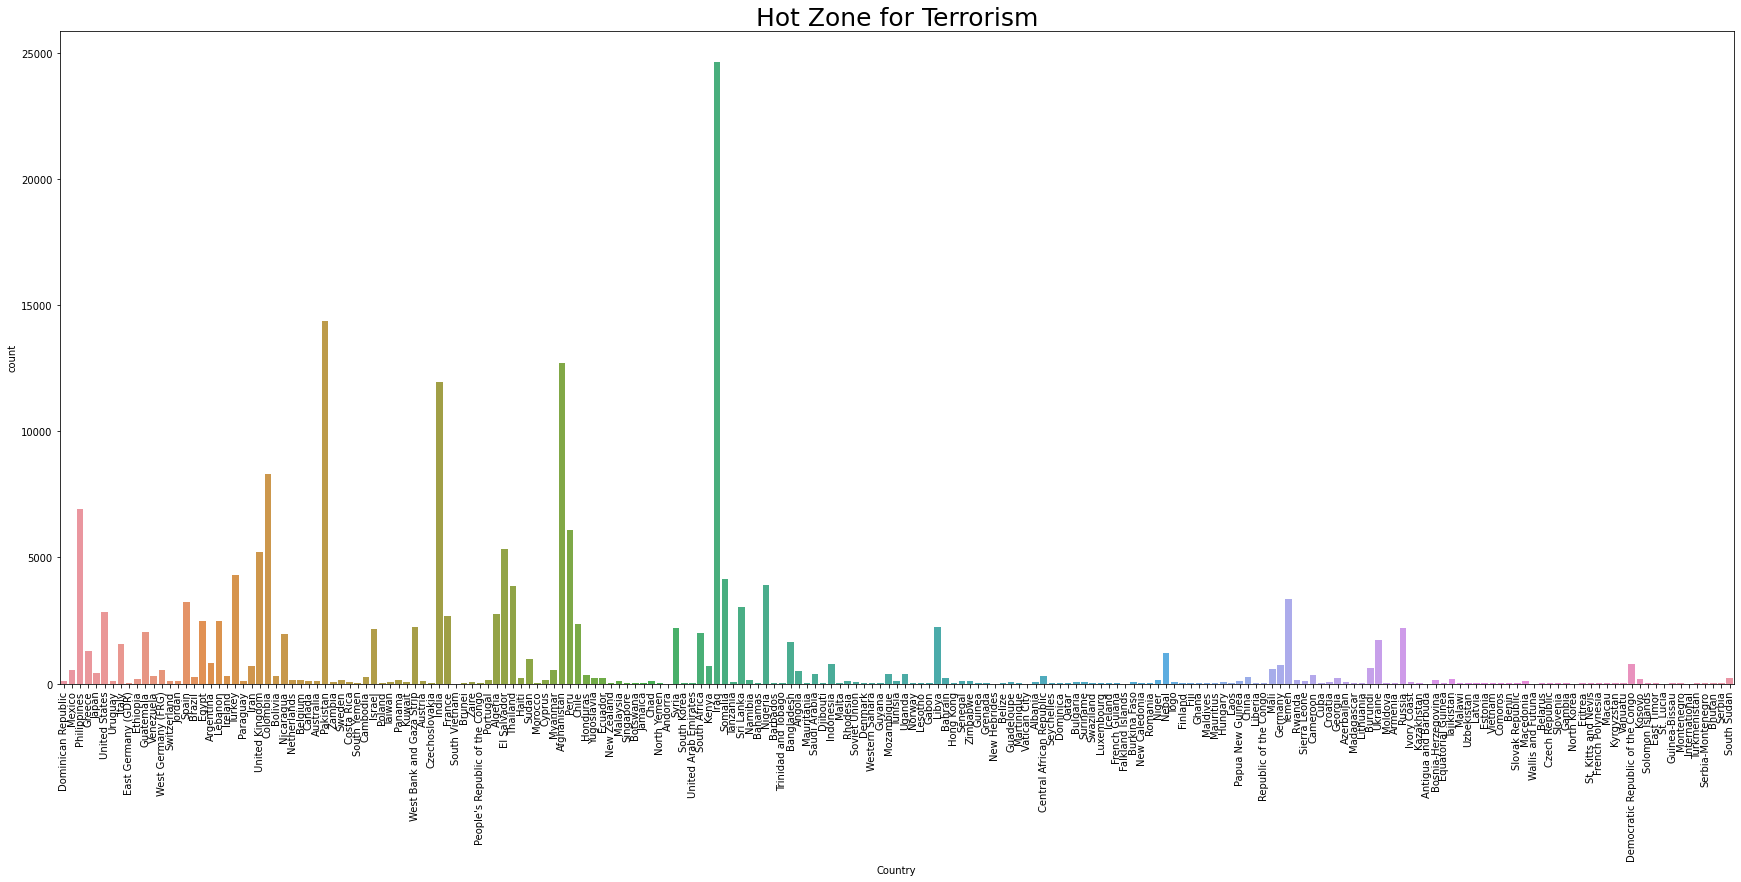

In [13]:
#Plotting the countplot Country vs Count of terrorist attack on Country

plt.figure(figsize=(30,12))
sns.countplot('Country', data=terror_data)
plt.title('Hot Zone for Terrorism', fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Plotting the barplot which has Top 10 Country which has Hot Zone

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


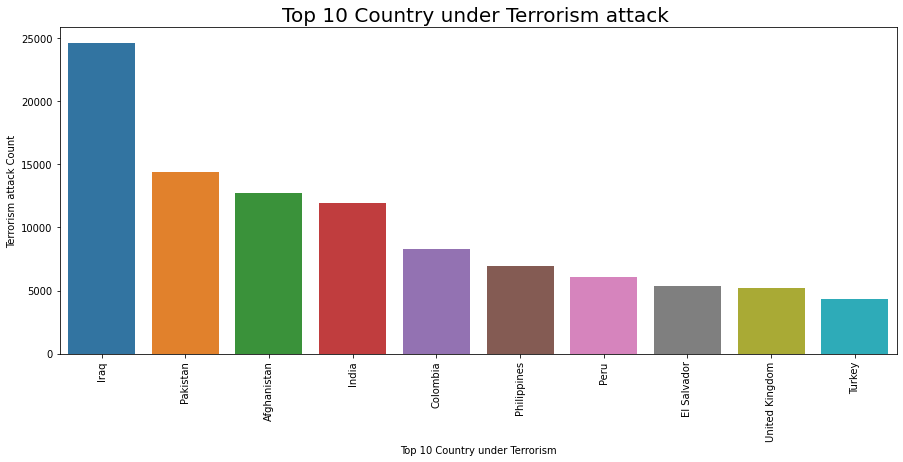

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['Country'].value_counts()[:10].index, terror_data['Country'].value_counts()[:10].values)
plt.xlabel('Top 10 Country under Terrorism')
plt.ylabel('Terrorism attack Count')
plt.title('Top 10 Country under Terrorism attack ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## From abow barplot we can see that Iraq is the Hot Zone of Terrorist Attack

## After the Iraq, Pakistan and Afghanistan, India is the Hot Zone of Terrorist

In [15]:
print("Country with less terrorism ")
terror_data['Country'].value_counts().tail()

Country with less terrorism 


St. Lucia              1
Vatican City           1
Andorra                1
Antigua and Barbuda    1
North Korea            1
Name: Country, dtype: int64

## From abow values we can see that North Korea and New Hebrides are less under attack

In [16]:
#Number of People Killed and Injured according to the Country

country1 = terror_data.groupby(['Country'])['Country', 'Kill', 'Injured'].sum()
country1.head()

,Kill,Injured
Country,,
Afghanistan,39384.0,44277.0
Albania,42.0,126.0
Algeria,11066.0,9150.0
Andorra,0.0,0.0
Angola,3043.0,2455.0


### From abow values we can see that in Afghanistan more People Killed and Injured 

In [17]:
print('Amount of pepople Killed and Injured per year')
year1 = terror_data.groupby(['Year'])['Kill', 'Injured'].sum()
year1.head(8)

Amount of pepople Killed and Injured per year


,Kill,Injured
Year,,
1970,174.0,212.0
1971,173.0,82.0
1972,566.0,409.0
1973,370.0,495.0
1974,539.0,865.0
1975,617.0,617.0
1976,674.0,756.0
1977,456.0,518.0


In [18]:
print('Amount of pepople Killed and Injured per year')
year2 = terror_data.groupby(['Year'])['Kill', 'Injured'].sum()
year2.tail(10)

Amount of pepople Killed and Injured per year


,Kill,Injured
Year,,
2008,9157.0,18998.0
2009,9273.0,19138.0
2010,7827.0,15947.0
2011,8246.0,14659.0
2012,15497.0,25445.0
2013,22273.0,37688.0
2014,44490.0,41128.0
2015,38853.0,44043.0
2016,34871.0,40001.0


## From abow we can see that Number of People Killed and Injured as per Year and aslo we can see that as Year increasing Number of killing and Injuries aslo increasing.

In [19]:
#Terrorist activity per Year

year3 = terror_data['Year'].value_counts()
year3.head()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: Year, dtype: int64

# Count of Terrorism attack per Year

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


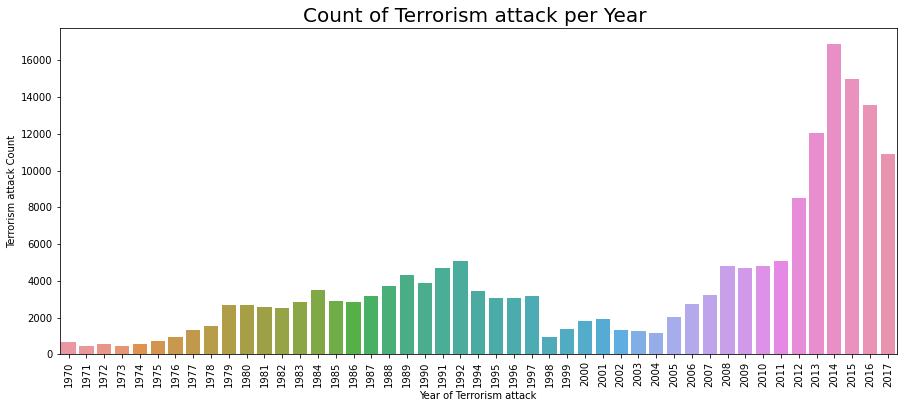

In [20]:
plt.figure(figsize=(15,6))
sns.countplot('Year', data=terror_data)
plt.xlabel('Year of Terrorism attack')
plt.ylabel('Terrorism attack Count')
plt.title('Count of Terrorism attack per Year ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Attack_Type and Weapon_Type used against Country

In [21]:
attack_type = terror_data.groupby(['Country'])['Attack_Type', 'Weapon_Type'].max()
attack_type.head(10)

,Attack_Type,Weapon_Type
Country,,
Afghanistan,Unknown,Vehicle (not to include vehicle-borne explosiv...
Albania,Unknown,Unknown
Algeria,Unknown,Unknown
Andorra,Armed Assault,Firearms
Angola,Unknown,Unknown
Antigua and Barbuda,Facility/Infrastructure Attack,Incendiary
Argentina,Unknown,Unknown
Armenia,Hostage Taking (Kidnapping),Unknown
Australia,Unknown,Vehicle (not to include vehicle-borne explosiv...


In [22]:
#Number of Attacking type used 

terror_data['Attack_Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

# Number of Attacking Types used for Attack Purpose

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


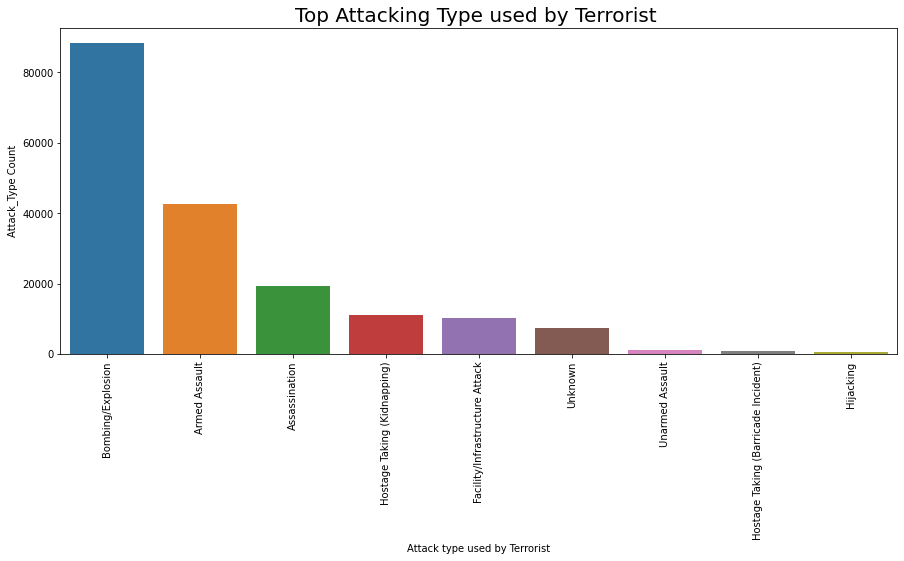

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['Attack_Type'].value_counts()[:10].index, terror_data['Attack_Type'].value_counts()[:10].values)
plt.xlabel('Attack type used by Terrorist')
plt.ylabel('Attack_Type Count')
plt.title('Top Attacking Type used by Terrorist ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## From abow barplot we can see that Bombing/Explosion and Armed Assault is used much more than other attacking type

In [24]:
#Weapon types used for attacking purpose

terror_data['Weapon_Type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

# Weapon Type used for Attacking Purpose

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


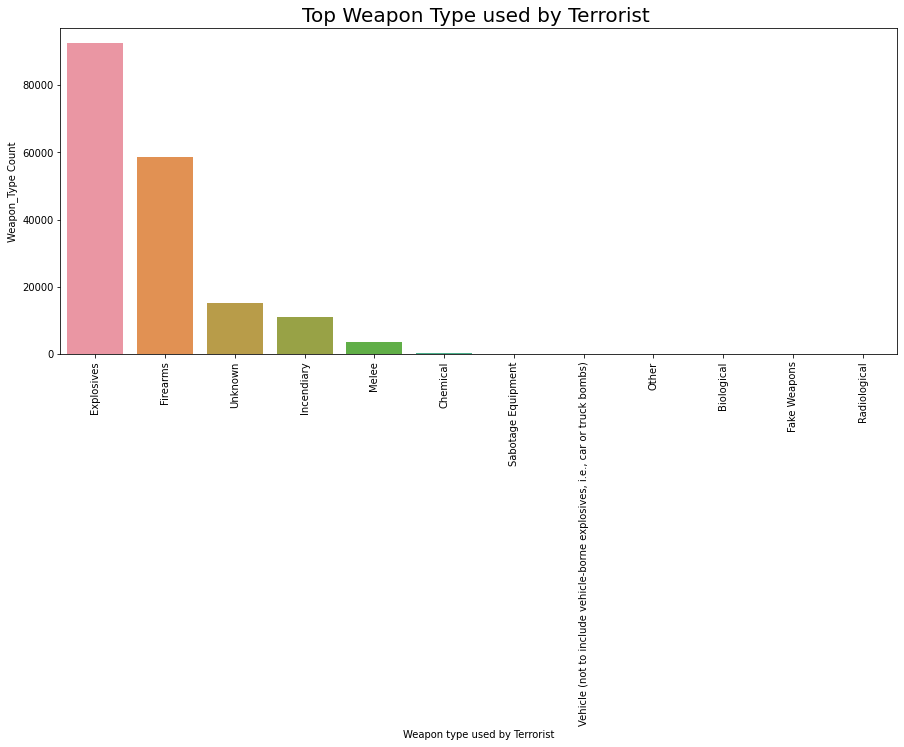

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['Weapon_Type'].value_counts()[:15].index, terror_data['Weapon_Type'].value_counts()[:15].values)
plt.xlabel('Weapon type used by Terrorist')
plt.ylabel('Weapon_Type Count')
plt.title('Top Weapon Type used by Terrorist ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## From abow barplot we can see that Explossives and firearms used much more than other Weapon type

In [26]:
#Region which is used for attacking purpose

region = terror_data['Region'].value_counts()
region.head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

# Region in which More Attack has been happened

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


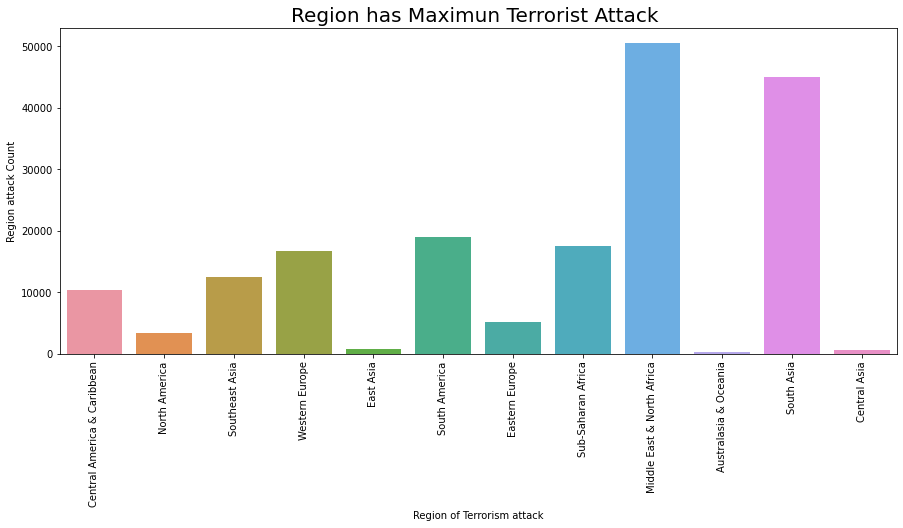

In [27]:
plt.figure(figsize=(15,6))
sns.countplot('Region', data=terror_data)
plt.xlabel('Region of Terrorism attack')
plt.ylabel('Region attack Count')
plt.title('Region has Maximun Terrorist Attack ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## From abow countplot we can see that Middle East and North Africa , South Asia Region is more under attack

In [28]:
#City which is Maximum times under attack

city = terror_data['City'].value_counts()
city.head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

# City with Maximun Attack

C:\Users\srinivas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


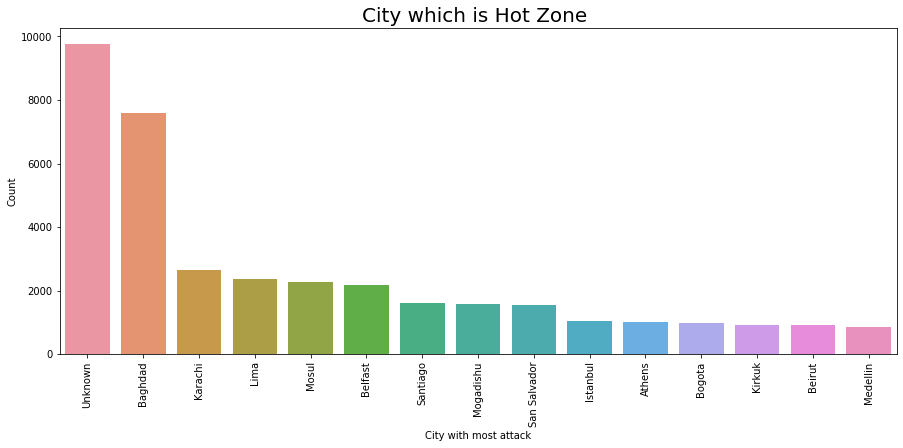

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['City'].value_counts()[:15].index, terror_data['City'].value_counts()[:15].values)
plt.xlabel('City with most attack')
plt.ylabel('Count')
plt.title('City which is Hot Zone ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

### From abow barplot we can see that Baghdad and Karachi, Lima is most time under attack

# Thanking You